# ASSIGNMENT 3: CLUSTERING
- Neha Devi Shakya (gusshakne@student.gu.se): 15 hours
- Sarvesh Meenowa (gusmeesa@student.gu.se): 15 hours

In [3]:
# connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import required libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
!pip install kneed
from kneed import KneeLocator

from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# set plot theme and font size
sns.set_theme()
sns.set(font_scale = 2)

In [6]:
df = pd.read_csv("/content/drive/Shareddrives/Introduction to data science/Assignment 3/Datasets/data_all.csv")
df.head()

,residue name,position,chain,phi,psi
0,LYS,10,A,-149.312855,142.657714
1,PRO,11,A,-44.283210,136.002076
2,LYS,12,A,-119.972621,-168.705263
3,LEU,13,A,-135.317212,137.143523
4,LEU,14,A,-104.851467,95.928520


## 1. Show the distribution of phi and psi combinations using:
### a. A scatter plot
### b. A 2D histogram 
## Make sure the plots are nice and clean. Can you modify them for better visualisation?

### a. A scatter plot

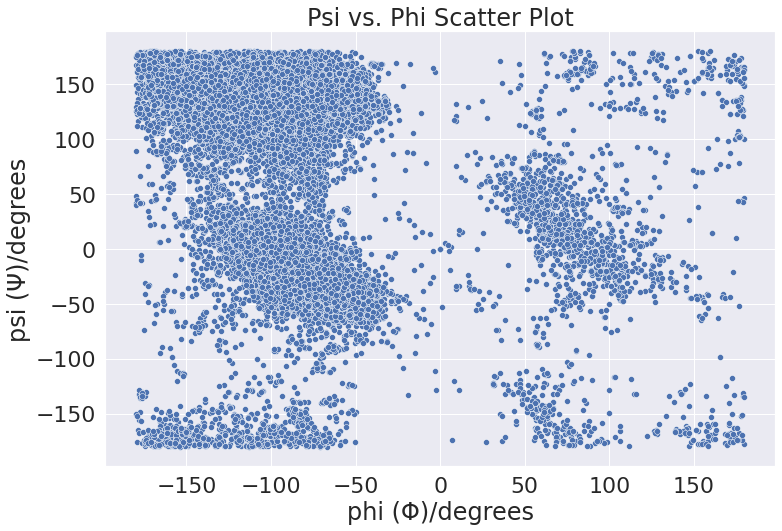

In [7]:
plt.figure(figsize=(12, 8))

sns.scatterplot(data = df, x = "phi", y = "psi")

plt.title("Psi vs. Phi Scatter Plot")
plt.xlabel("phi (Φ)/degrees")
plt.ylabel("psi (Ψ)/degrees")
plt.show()

### b. A 2D histogram 

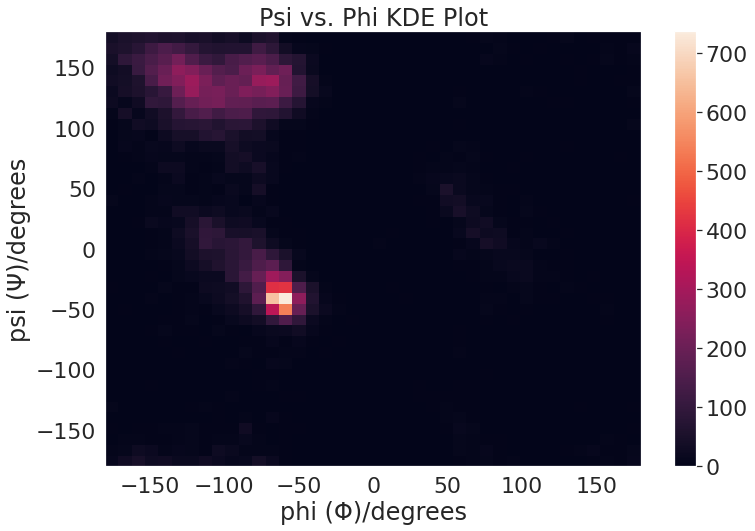

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
h = ax.hist2d( data = df, x = "phi", y = "psi", bins = 40)
fig.colorbar(h[3], ax = ax)

plt.title("Psi vs. Phi KDE Plot")
plt.xlabel("phi (Φ)/degrees")
plt.ylabel("psi (Ψ)/degrees")
plt.show()

For better visualisation we can create a smooth heatmap (kde plot).

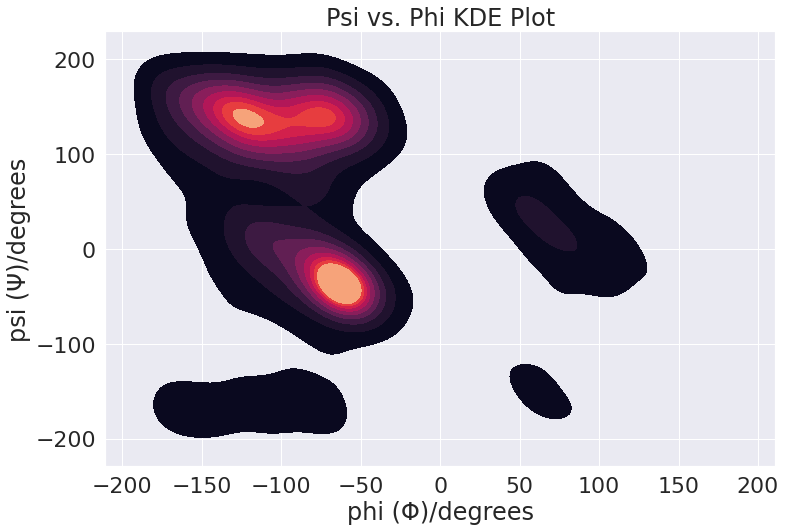

In [ ]:
plt.figure(figsize=(12, 8))

sns.kdeplot(
    data = df, x="phi", y="psi",fill=True,cmap="rocket"
)

plt.title("Psi vs. Phi KDE Plot")
plt.xlabel("phi (Φ)/degrees")
plt.ylabel("psi (Ψ)/degrees")
plt.show()

## 2.	Use the K-means clustering method to cluster the phi and psi angle combinations in the data file.

### a.	Experiment with different values of K. Suggest an appropriate value of K for this task and motivate this choice.

The elbow approach is one way to choose an optimal k-value for K-means clustering. This method depicts the sum of squared errors for various numbers of clusters, and the number of clusters where the 'elbow' is found is the optimal number. 

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[["phi","psi"]])

In [ ]:
#plot elbow to determine number of ks
kmeans_kwargs = {"n_init": 10, "max_iter": 300, "random_state": 42, "init":'k-means++'}

We used k-mean++ to select initial cluster centers for k-mean clustering in a smart way to speed up convergence

In [ ]:
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  sse.append(kmeans.inertia_)

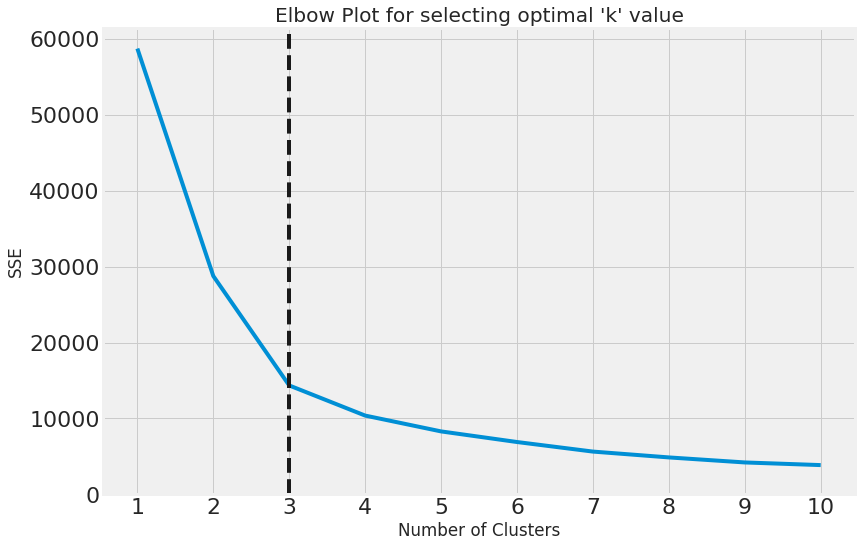

In [ ]:
plt.figure(figsize=(12, 8))
plt.style.use("fivethirtyeight")

plt.plot(range(1, 11), sse)

plt.xticks(range(1, 11))
plt.ylim(ymin=0)

plt.axvline(x = 3, color = 'k', linestyle='--')

plt.title("Elbow Plot for selecting optimal 'k' value")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")

plt.show()

In [ ]:
#to identify the elbow point programmatically
knee_locator = KneeLocator(
      range(1, 11), sse, curve="convex", direction="decreasing")

In [ ]:
knee_locator.elbow

3

Using the kneed package, it returns the value at which the elbow occurs, we preferred to use a computational tool to determine the elbow rather than rely on our own eyes since sometimes there may be ambiguity.

---------

A measure of cluster cohesion and separation is the silhouette coefficient. It uses two factors to determine how well a data point fits into its given cluster:

1.How near is the data point to the other cluster points?

2.What is the distance between the data point and points in other clusters?



The values of the silhouette coefficient vary from -1 to 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters.



The average silhouette coefficient of all the samples is summed into one score in the scikit-learn implementation of the silhouette coefficient. Otherwise, the silhouette score() function will throw an error if there aren't at least two clusters.



We loop over the k values once again. Instead of calculating the SSE, the Silhouette coefficient is calculated

In [ ]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

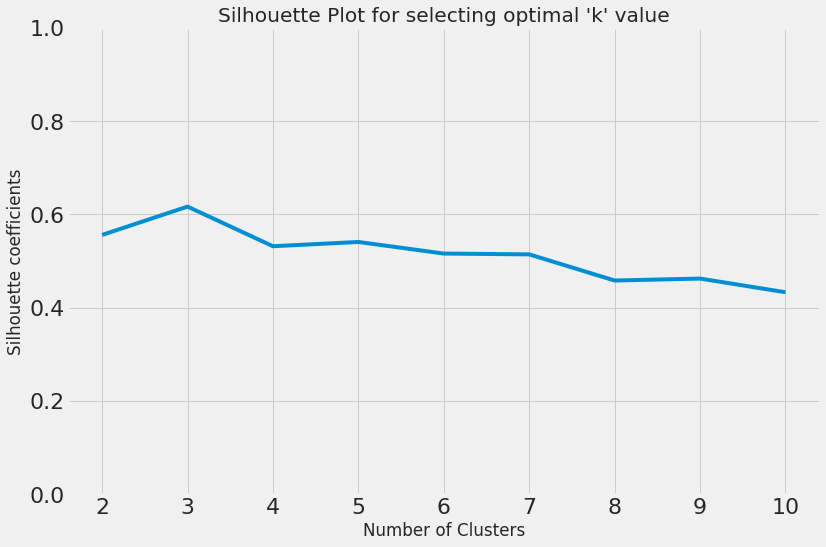

In [ ]:
plt.figure(figsize=(12, 8))
plt.style.use("fivethirtyeight")

plt.plot(range(2, 11), silhouette_coefficients)

plt.xticks(range(2, 11))
plt.ylim([0,1])

plt.title("Silhouette Plot for selecting optimal 'k' value")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette coefficients")

plt.show()

In [ ]:
print("The highest Silhouette coefficient score is {} for a value of k = 3".format((max(silhouette_coefficients))))

The highest Silhouette coefficient score is 0.6166516786268311 for a value of k = 3



Plotting the average silhouette scores for each k shows that the best choice for k is 3 since it has the maximum score. Hence using both the Silhouette coefficient and the elbow method, we find k = 3 to be the optimal number of clusters.

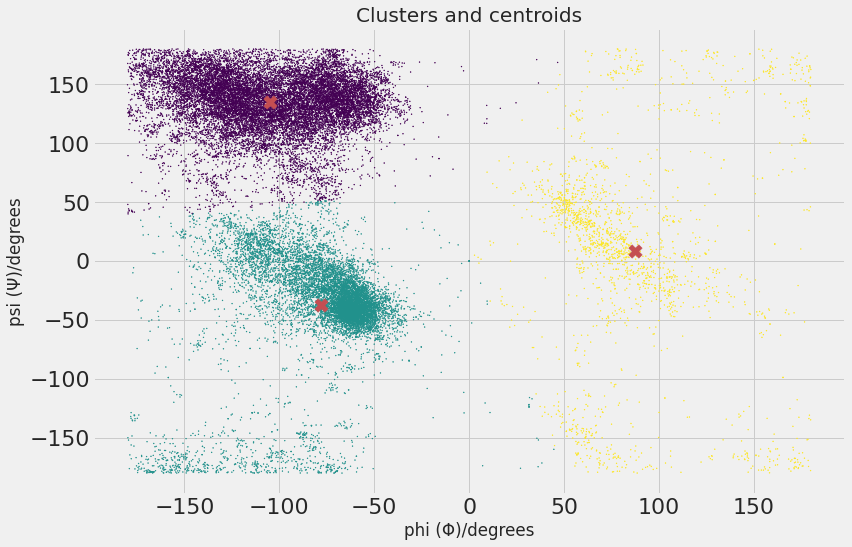

In [ ]:
plt.figure(figsize=(12, 8))

# we select number of clusters to be 3 after applying elbow and silhouette method
kmeans =  KMeans(n_clusters=3,random_state=0).fit(df[["phi","psi"]])
# Get the cluster centroids and labels
centroids = kmeans.cluster_centers_
centroid_labels = kmeans.labels_

# Plotting the cluster centers and data points
plt.scatter(df['phi'], df['psi'], 0.75, c=centroid_labels.astype(float), cmap="viridis")
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', marker='X', s=180)

plt.title('Clusters and centroids')
plt.xlabel("phi (Φ)/degrees")
plt.ylabel("psi (Ψ)/degrees")

plt.show()

(b) b.	Do the clusters found in part (a) seem reasonable?

There are ways to check if the clustering was done correctly, i.e we need to validate the clustering. To do so, there are few methods such as :
* Stability on subsets : 
> Clustering stable if removing a proportion of 
random points does not change the clustering 
fundamentally.
* Co-occurrence
> For all pairs (i,j) count how frequently i and j 
are in the same cluster. 
* Stability over repetitions
> Clustering stable if (almost) always same 
points end up in the same clusters togethers 
(co-occurrence frequencies) from random 
initializations

* Silhouette coefficient
> a: The mean distance between a sample and all other points in the 
same class. 
> b: The mean distance between a sample and all other points in the next 
nearest cluster.

  > $S = \frac{b-a}{max(a,b)}$

  > The Silhouette coefficient ranges between -1 and 1. Higher
values indicate good separation between clusters.


We obtained a Silhouette coefficient of 0.62 which is a moderately high score, howvever to make sure that the results are correct, we can perform another validation method such as assessing the stability on subsets. So we would remove a random portion of points and check if the clustering does not change fundamentally.

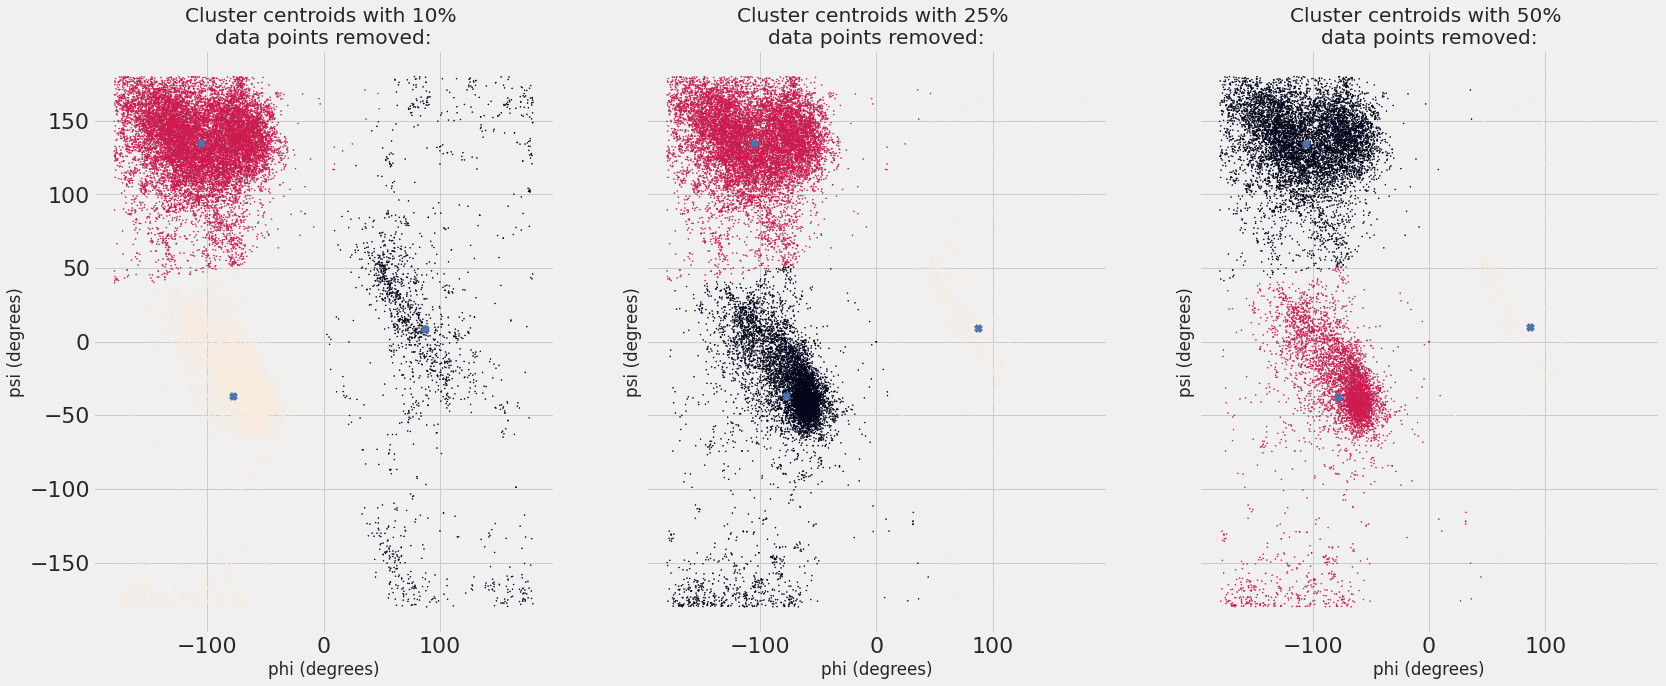

In [ ]:
# proportions to remove 
proportions = [10,25,50]

fig, axs = plt.subplots(1,len(proportions), sharex = True, sharey = True)
for i in range(len(proportions)):
    prop = df.sample(frac = 1-proportions[i]/100, replace=False, random_state=1)[["phi", "psi"]]
    kmeans = KMeans(n_clusters=3, **kmeans_kwargs).fit(prop)
    axs[i].set(xlabel = 'phi (degrees)', ylabel = 'psi (degrees)', title = 'Cluster centroids with {}% \ndata points removed:'.format(proportions[i]))
    axs[i].scatter(prop["phi"], prop["psi"], s = 1, c=kmeans.labels_.astype(float))
    axs[i].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='b', marker='x')

fig.set_figwidth(25)
fig.set_figheight(10)
plt.show()

After checking the stability of clusters on subsets, we still end up with 3 clusters without any fundamental changes. Computationally, the clustering seems reasonable,furthermore one important aspect which is the domain knowledge further enhances the reasonability of the clustering. For instance,from the Ramachandran plot,the dots cluster into alpha helical (α),beta strand(β) and turn(at right) conformations. Regions with no dots means that those conformations do not occur.
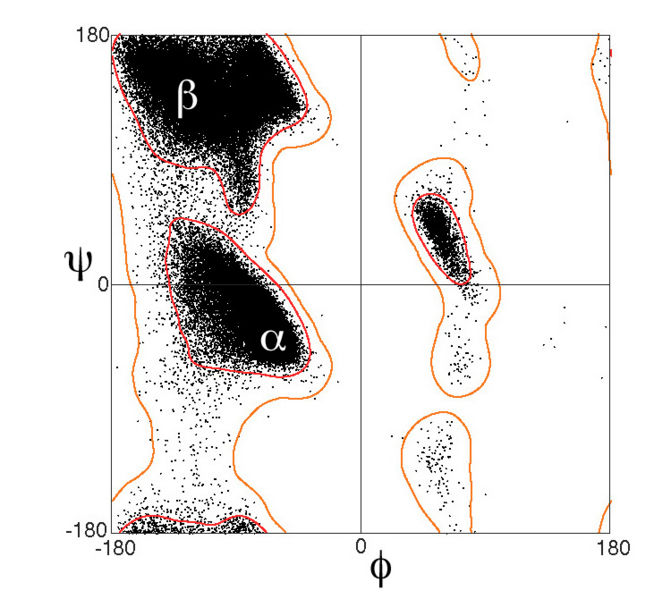

(c)(For a higher grade) Can you change the data to get better results (or the same results in a simpler way)? (Hint: since both phi and psi are periodic attributes, you can think of shifting/translating them by some value and then use the modulo operation.)

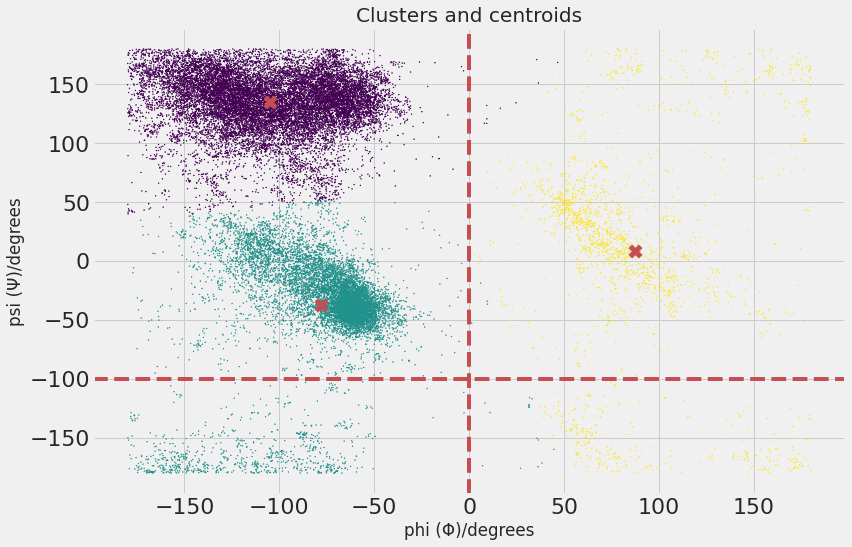

In [ ]:
plt.figure(figsize=(12, 8))

# we select number of clusters to be 3 after applying elbow and silhouette method
kmeans =  KMeans(n_clusters=3,random_state=0).fit(df[["phi","psi"]])
# Get the cluster centroids and labels
centroids = kmeans.cluster_centers_
centroid_labels = kmeans.labels_

# Plotting the cluster centers and data points
plt.scatter(df['phi'], df['psi'], 0.75, c=centroid_labels.astype(float), cmap="viridis")
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', marker='X', s=180)

plt.axhline(y=-100, color='r', linestyle='--')
plt.axvline(x=0, color='r', linestyle='--')

plt.title('Clusters and centroids')
plt.xlabel("phi (Φ)/degrees")
plt.ylabel("psi (Ψ)/degrees")

plt.show()

Both phi and psi are periodic attributes, that is their angles are periodic which means that each angle has an equivalent angle of 360° in both positive and negative directions. 

From the scatter plot in 1a) When Ψ and Φ are around -100 and 0 degrees respectively, we can see a separation if we draw a vertical line at Φ = 0° and a horizontal line Ψ = -100°, translating the points for Ψ and Φ according to the mentioned boundaries may allow to view the clusters better. 



In [8]:
# we translate psi by 100 degrees and take modulo 360 for both phi and psi
df['phi_shifted'] = df['phi'].apply(lambda x: ((x) % 360))
df['psi_shifted'] = df['psi'].apply(lambda x: ((x + 100) % 360))

In [ ]:
df.head()

,residue name,position,chain,phi,psi,phi_shifted,psi_shifted
0,LYS,10,A,-149.312855,142.657714,210.687145,242.657714
1,PRO,11,A,-44.283210,136.002076,315.716790,236.002076
2,LYS,12,A,-119.972621,-168.705263,240.027379,291.294737
3,LEU,13,A,-135.317212,137.143523,224.682788,237.143523
4,LEU,14,A,-104.851467,95.928520,255.148533,195.928520


After the translations of the points, we can try to view the updated plot.

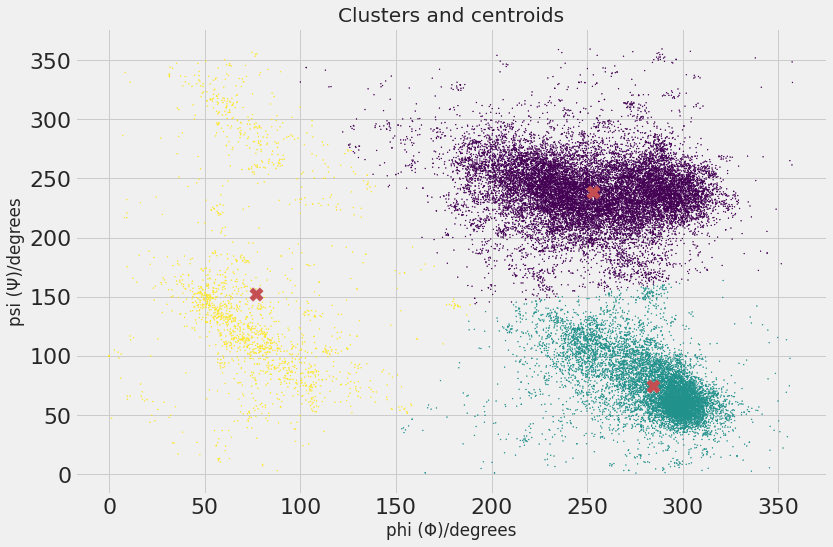

In [ ]:
# we select number of clusters to be 3 after applying elbow and silhouette method
kmeans = KMeans(n_clusters=3, random_state=0).fit(df[["phi_shifted","psi_shifted"]])
# Get the cluster centroids and labels
centroids = kmeans.cluster_centers_
centroid_labels = kmeans.labels_

# Plotting the cluster centers and data points
plt.figure(figsize=(12, 8))
plt.scatter(df['phi_shifted'], df['psi_shifted'], 0.75, c=centroid_labels.astype(float),cmap ='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', marker='X', s=180)

plt.title('Clusters and centroids')
plt.xlabel("phi (Φ)/degrees")
plt.ylabel("psi (Ψ)/degrees")

plt.show()

We can also recalculate the Silhouette coefficient to see if the score improved upon translating the data points.

In [ ]:
silhouette_score(df[["phi_shifted","psi_shifted"]], kmeans.labels_)

0.6832818191628277

The new Silhouette coefficient for k = 3 has changed from 0.62 to 0.68 which means that the clusters became more compact.

## 3. Use the DBSCAN method to cluster the phi and psi angle combinations in the data file.

In [9]:
df = df.sort_values(by = ["phi_shifted", "psi_shifted"])
df2 = df[["phi_shifted", "psi_shifted"]]

In [10]:
X = StandardScaler().fit_transform(df2)

In [11]:
neighb = NearestNeighbors(n_neighbors=10) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(X) # fitting the data to the object
distances,indices=nbrs.kneighbors(X) # finding the nearest neighbours

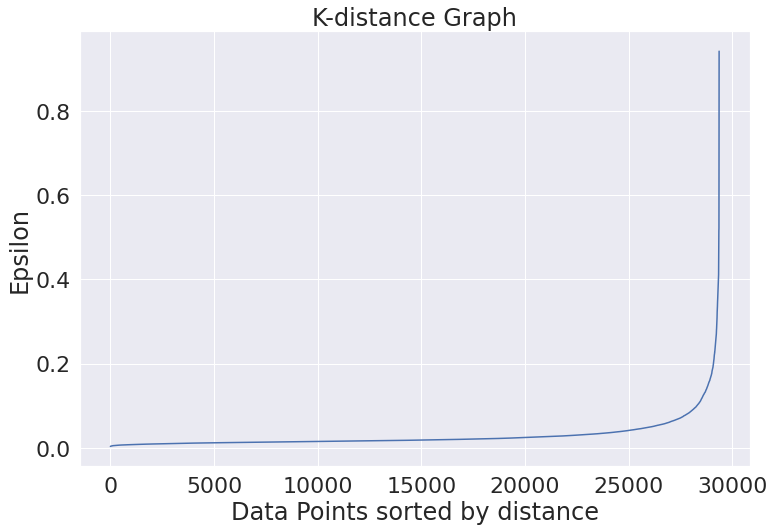

In [12]:
# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, -1] # taking the last column of the sorted distances
plt.figure(figsize=(12,8))
plt.plot(distances)
plt.title('K-distance Graph')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')
plt.show()

We can see that the epsilon starts to increase exponentally from around the point 29000 so we find the index of largest difference before 29000.

In [13]:
epsilon_id = np.diff(distances[0:29000]).argmax()
epsilon = distances[epsilon_id]

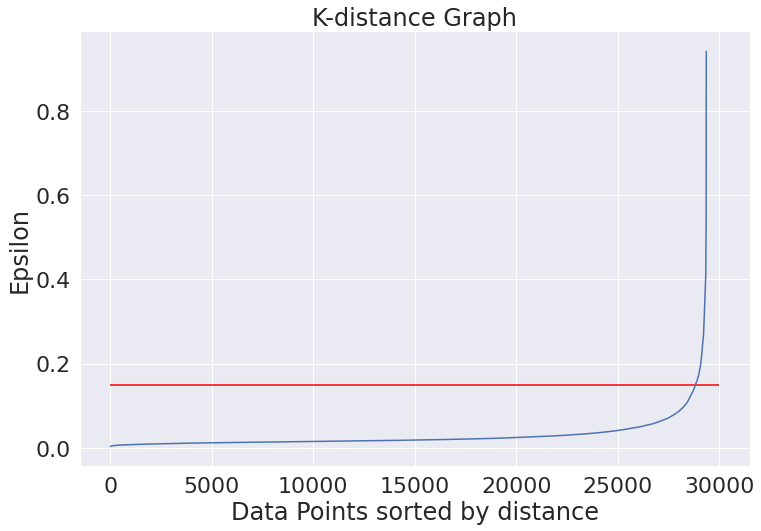

In [14]:
plt.figure(figsize=(12,8))

plt.plot(distances)
plt.hlines(distances[epsilon_id], 0, 30000, colors = ["red"])

plt.title('K-distance Graph')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')
plt.show()

In [15]:
print(f"We intercept the graph at x = {epsilon_id} , y = {epsilon}")

We intercept the graph at x = 28827 , y = 0.1486108338671058


In [ ]:
# Choosing min_sample value range
min_samples = range(10, 105, 5)
length_samples = len(min_samples)
n_samples = 1000
max_score = 0
best_min_samples = 0

for j in range (0, length_samples):
    
    # Compute DBSCAN with the different values
    db = DBSCAN(eps = epsilon, min_samples = min_samples[j]).fit(X)
    labels = db.labels_
    silhouette_avg = silhouette_score(X, labels)
    if abs(silhouette_avg) > max_score:
      max_score = abs(silhouette_avg)
      best_min_samples = min_samples[j]
    
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

print(f"Best sample size is {best_min_samples} at a silhouette score of {max_score}")

Best sample size is 70 at a silhouette score of 0.578020451544905


In [ ]:
# Choosing new min_sample value range
min_samples = range(best_min_samples - 10, best_min_samples + 11)
length_samples = len(min_samples)

for j in range (0, length_samples):
    
    # Compute DBSCAN with the different values
    db = DBSCAN(eps = epsilon, min_samples=min_samples[j]).fit(X)
    labels = db.labels_
    silhouette_avg = silhouette_score(X, labels)
    if abs(silhouette_avg) > max_score:
      max_score = abs(silhouette_avg)
      best_min_samples = min_samples[j]
    
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

print(f"Best sample size is {best_min_samples} at a silhouette score of {max_score}")

Best sample size is 68 at a silhouette score of 0.5783896637365871


### a. Motivate:
#### i. the choice of the  minimum number of samples in  the  neighbourhood for a point to be considered as a core point

The min_samples parameter is the minimum number of points in a cluster.
Choosing a reasonable min_samples value in the neighbourhood for a point to be regarded as a core point should preferably be done by a domain expert with an extensive understanding of the data. However, we do not have prior domain knowledge. For example, setting the threshold too low enables more outliers to be clustered, which we want to avoid.

The heuristic in the papers "[DBSCAN Revisited, Revisited: Why and How You Should (Still) Use DBSCAN](https://www.ccs.neu.edu/home/vip/teach/DMcourse/2_cluster_EM_mixt/notes_slides/revisitofrevisitDBSCAN.pdf)" and "[Density-Based Clustering in Spatial Databases: The Algorithm GDBSCAN and its Applications](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.63.1629&rep=rep1&type=pdf)" suggests keeping min_sample at the default value of 4 (for two-dimensional data) or setting it to twice the dataset dimensionality, i.e., min_sample = 2 · dim (which is also 4 in our case).

Another heuristic is given in the paper "[ST-DBSCAN: An algorithm for clustering spatial-temporal data](https://reader.elsevier.com/reader/sd/pii/S0169023X06000218)", which suggests min_samples ≈ ln(n), where n is the size of the database, and the epsilon must be picked depending on the value of min_samples. Over 29000 samples resulted in a threshold of 10 samples in our case.

Both suggested values of 4 and 10 proved to be too low for our purpose. Thus we first used the value 10 to find a suitable epsilon and then the min_sample that resulted in the highest silhouette score, which gave us the value of 68.

#### ii. the  choice  of  the  maximum  distance  between  two  samples  belonging to the same neighbourhood (“eps” or “epsilon”).

Epsilon is the max distance between two points considered neighbours. We determined an appropriate value for epsilon by computing the distance to the nearest k points (in our case, k = 10) for each point, sorting the results, and plotting the results. Then we checked the index at which the most noticeable change was and chose that as our epsilon, which resulted in the value of 0.1486.

### b. Highlight  the  clusters  found  using  DBSCAN  and  any  outliers  in  a  scatter  plot. How  many  outliers  are  found?  Plot  a  bar  chart  to  show  which  amino  acid residue types are most frequently outliers.

In [16]:
best_min_samples = 68

# compute DBSCAN
db = DBSCAN(eps = epsilon, min_samples = best_min_samples).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_


# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 1898


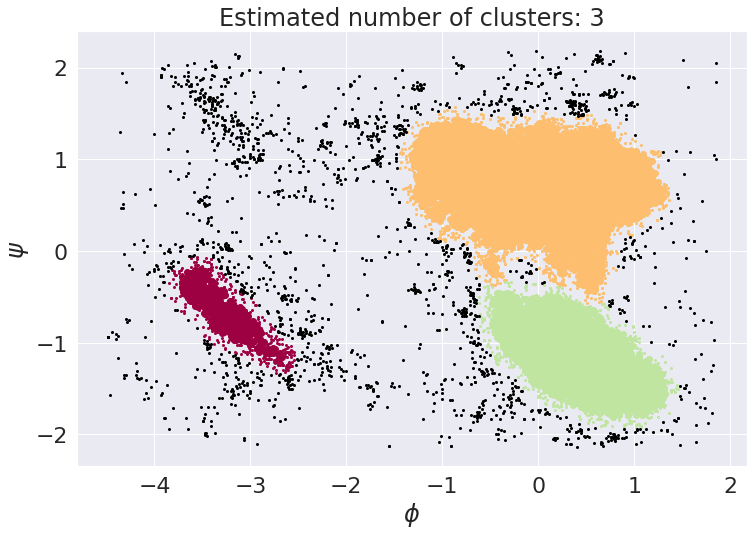

In [17]:
# Plot result
plt.figure(figsize=(12, 8))
# Black removed from colors
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
        markeredgecolor=tuple(col), markersize=6)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor=tuple(col), markersize=2)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.xlabel(r'$\phi$')
plt.ylabel(r'$\psi$')
plt.show()

  > There are 1898 outliers which are colored in black.

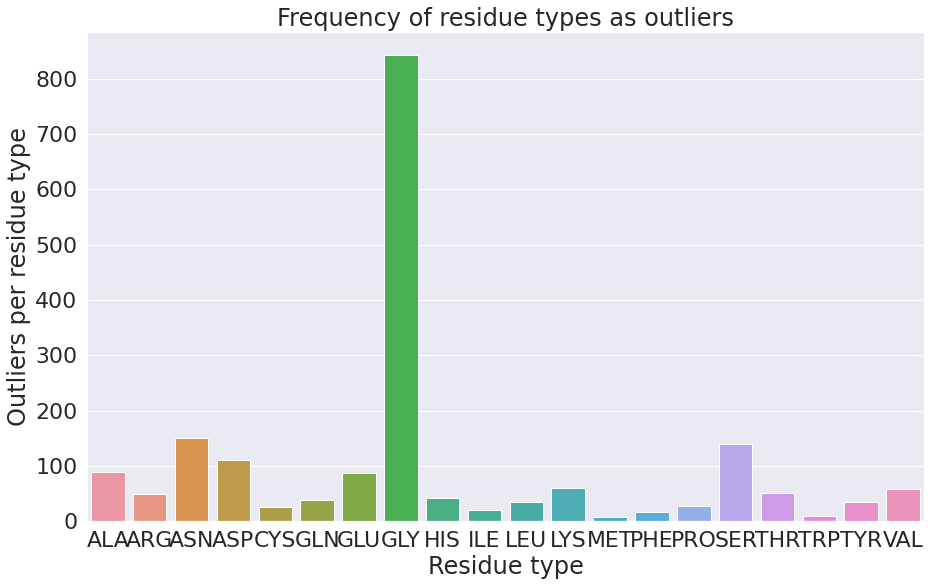

In [18]:
# select noise points
noise_df = df[class_member_mask]

# count number of each name occuring in df, create column counts to store value
noise_df = noise_df.groupby(['residue name']).size().reset_index(name = "counts")

plt.figure(figsize=(15, 9))

#create barplot
sns.barplot(x=noise_df["residue name"], y = noise_df["counts"])

plt.title("Frequency of residue types as outliers")
plt.xlabel("Residue type")
plt.ylabel("Outliers per residue type")

plt.show()

The residue type GLY is a biggest outlier with over 800 point, as shown in the bar chart, whereas the remaining residue types are relatively lower noise points, all below 200.

### c. Compare the clusters found by DBSCAN with those found using K-means.

Despite the fact that both algorithms produced three clusters from the data set, there are notable differences. K-means, on one hand, includes every single data point in a cluster, regardless of how far apart it is. Using K-means, no points are designated as outliers. DBSCAN, on the other hand, classifies a high proportion of data points as outliers since they lack enough neighbors to be designated a core or border point. This suggests that DBSCAN outperforms K-mean in terms of detecting and ignoring noise, as well as forming more stable clusters. Even if the data were broken into the same number of clusters, DBSCAN is usually better at identifying smaller clusters than K-means.

DBSCAN clustering is heavily influenced by the values chosen for min_samples and eps. K-means is just dependent on the variable k, which may be determined using the elbow method. Since DBSCAN is based on density, it can detect clusters even if the shape isn't circular. In this context, it makes little difference, but if a cluster were to wrap around another cluster, only DBSCAN would be able to detect it.

### d. Discuss whether the clusters found using DBSCAN are robust to small changes in  the  minimum  number  of  samples  in  the  neighbourhood  for  a  point  to  be considered  as  a  core  point,  and/or  the  choice  of  the  maximum  distance between two samples belonging to the same neighbourhood (“eps” or “epsilon”).

In [19]:
# set range of small differences for epsilon
epsilon_diffs = [-0.03, -0.02, -0.01, 0, 0.01, 0.02, 0.03]

# set range of small differences for min_sample
min_sample_diffs = [-15, -10, -5, 0, 5, 10, 15]

# Create 2D array with eps differences as rows, and 
# sample differences as columns
diff_matrix = np.empty([len(epsilon_diffs), len(min_sample_diffs)])

# Calculate number of clusters depending on
# difference in eps and minPts
for i, eps_diff in enumerate(epsilon_diffs):
    for j, samp_diff in enumerate(min_sample_diffs):
        
        # Compute DBSCAN with given values
        db = DBSCAN(eps = epsilon + eps_diff, min_samples=71 + samp_diff).fit(X)
        labels = db.labels_
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        
        # Insert number of found clusters in the 2D array
        diff_matrix[i][j] = n_clusters_

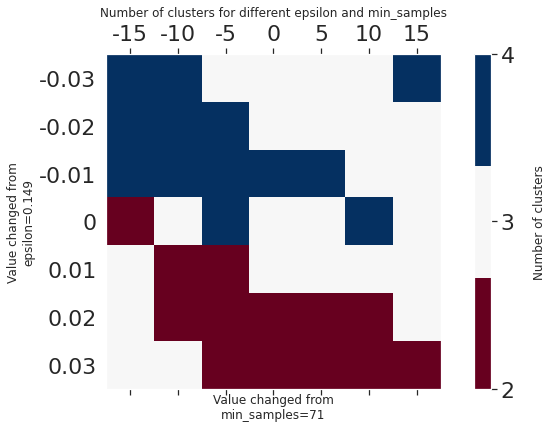

<Figure size 720x720 with 0 Axes>

In [20]:
# Transform the 2D array into a dataframe with
# corresponding labels
n_clusters_matrix = pd.DataFrame(diff_matrix, index=epsilon_diffs, columns=min_sample_diffs)

# Plot matrix of no. of clusters depending
# on eps and minPts
plt.figure(figsize=(12,6))
x_pos = [i for i,_ in enumerate(min_sample_diffs)]
y_pos = [i for i,_ in enumerate(epsilon_diffs)]

# Retrieve discrete colormap
min_clusters = np.min(diff_matrix)
max_clusters = np.max(diff_matrix)
cmap = plt.get_cmap('RdBu', max_clusters - min_clusters + 1)

plt.figure(figsize=(10, 10))

# Plot matrix
plt.matshow(n_clusters_matrix, 
    cmap=cmap, 
    fignum=1
)
plt.title("Number of clusters for different epsilon and min_samples\n", fontsize = 12)
plt.xlabel("Value changed from\nmin_samples=71", fontsize = 12)
plt.ylabel(f"Value changed from\nepsilon={round(epsilon, 3)}", fontsize = 12)
# Re-label ticks
plt.xticks(x_pos, min_sample_diffs)
plt.yticks(y_pos, epsilon_diffs)
# Show colorbar
plt.grid(False)
cb = plt.colorbar(ticks=np.arange(min_clusters, max_clusters+1))
cb.set_label('\nNumber of clusters', fontsize = 12)
plt.show()

While testing different values of epsilon and min_samples, we observed small changes in those values resulted in different numbers of clusters. However, the small changes in epsilon can be more pronounced as compared to min_samples as shown in the above plot. This might be because the dataset has around 29,000 points, so changing the min_samples by 1 or 2 will not make a big difference, however a difference of 5 or 10 can make a difference. For epsilon,we use small values since the data was scaled, hence a ± 0.03 gives different number of clusters.

## 4. The data file can be stratified by amino acid residue type. 
### a.	Use DBSCAN to cluster the data that have residue type PRO. Investigate how the clusters found for amino acid residues of type PRO differ from the general clusters (i.e., the clusters that you get from DBSCAN with mixed residue types in question 3). 


In [ ]:
# filter amino acid with residue name PRO
pro_residue = df[df["residue name"] == "PRO"].reset_index()
pro_residue.head()

,index,residue name,position,chain,phi,psi,phi_shifted,psi_shifted
0,11272,PRO,321,A,9.549660,-36.608023,9.549660,63.391977
1,11995,PRO,321,B,17.366118,-36.541512,17.366118,63.458488
2,16490,PRO,397,L,177.563271,132.601078,177.563271,232.601078
3,381,PRO,11,D,-138.390221,105.099732,221.609779,205.099732
4,11729,PRO,42,B,-123.753543,130.076052,236.246457,230.076052


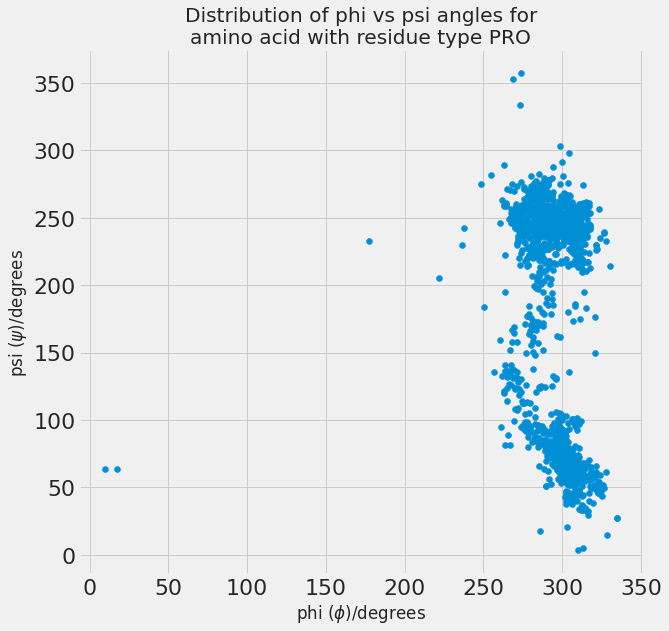

In [ ]:
# Scatter plot to see the distribution of the 
# samples of residue type PRO
plt.figure(figsize=(9, 9))
plt.title("Distribution of phi vs psi angles for\namino acid with residue type PRO")
plt.scatter(pro_residue["phi_shifted"], pro_residue["psi_shifted"])

plt.xlabel('phi ($\phi$)/degrees')
plt.ylabel('psi ($\psi$)/degrees')
plt.show()

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(pro_residue[["phi_shifted", "psi_shifted"]])

In [ ]:
#plot elbow to determine number of ks
kmeans_kwargs = {"n_init": 10, "max_iter": 300, "random_state": 42, "init":'k-means++'}

We used k-mean++ to select initial cluster centers for k-mean clustering in a smart way to speed up convergence

In [ ]:
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  sse.append(kmeans.inertia_)

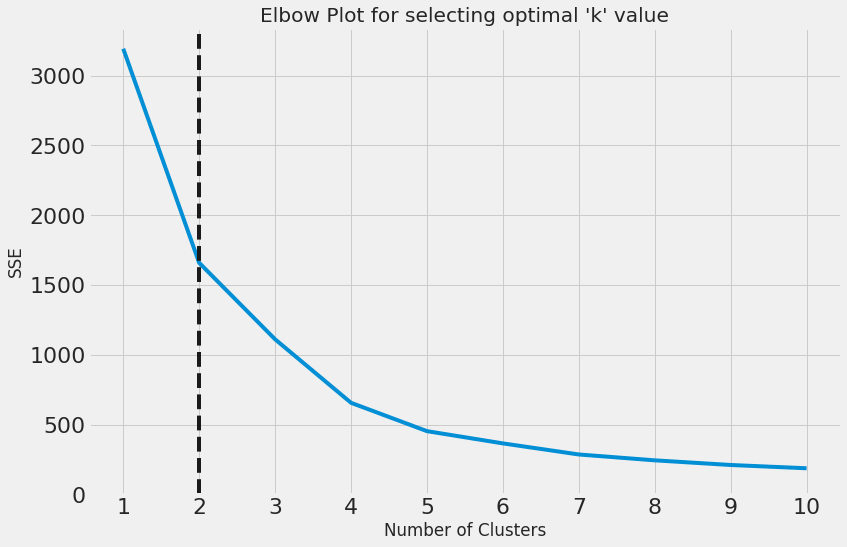

In [ ]:
plt.figure(figsize=(12, 8))
plt.style.use("fivethirtyeight")

plt.plot(range(1, 11), sse)

plt.xticks(range(1, 11))
plt.ylim(ymin=0)

plt.axvline(x = 2, color = 'k', linestyle='--')

plt.title("Elbow Plot for selecting optimal 'k' value")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")

plt.show()

From the elbow plot, we obtain the optimal k-value to be 2:

In [ ]:
pro_residue = pro_residue.sort_values(by = ["phi_shifted", "psi_shifted"])
pro_residue_2 = pro_residue[["phi_shifted", "psi_shifted"]]

In [ ]:
X = StandardScaler().fit_transform(pro_residue_2)

In [ ]:
# compute DBSCAN
db = DBSCAN(eps = 0.25, min_samples = 7).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_


# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 45


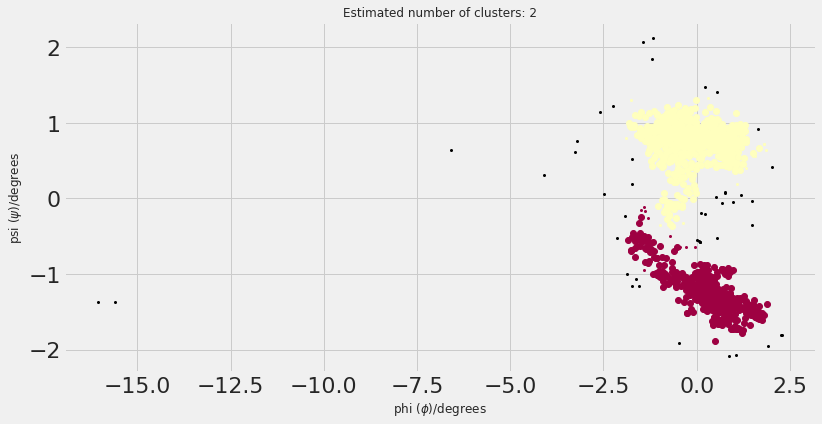

In [ ]:
# Plot result
plt.figure(figsize=(12, 6))
# Black removed from colors
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
        markeredgecolor=tuple(col), markersize=6)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor=tuple(col), markersize=2)

plt.title('Estimated number of clusters: %d' % n_clusters_, fontsize=12)
plt.xlabel('phi ($\phi$)/degrees', fontsize=12)
plt.ylabel('psi ($\psi$)/degrees', fontsize=12)
plt.show()

In order to tune the parameters for DBSCAN, k-means elbow plot was used to have an idea how many clusters to expect along with some domain knowledge. Since the sample size is smaller, we also used smaller epsilon and min_samples values.

Amino acids with the residue name PRO are mostly in the phi range of 250 to 350, and also range rather consistently over psi -100 to 200, they can be grouped into two clusters.They appear to be within the alpha helix cluster and beta strand cluster and aren't too spread out.They have less noise compared to the general cluster.

### b. Now use DBSCAN to cluster the data that have residue type GLY. Investigate how the clusters found for amino acid residues of type GLY differ from the general clusters.


In [ ]:
# filter amino acid with residue name GLY
gly_residue = df[df["residue name"] == "GLY"].reset_index()
gly_residue.head()

,index,residue name,position,chain,phi,psi,phi_shifted,psi_shifted
0,6830,GLY,1,G,10.971306,-128.616482,10.971306,331.383518
1,26888,GLY,7,D,16.412757,129.576068,16.412757,229.576068
2,3921,GLY,182,F,23.605778,47.161029,23.605778,147.161029
3,16129,GLY,35,L,24.206275,58.946030,24.206275,158.946030
4,12529,GLY,121,A,27.404842,60.564799,27.404842,160.564799


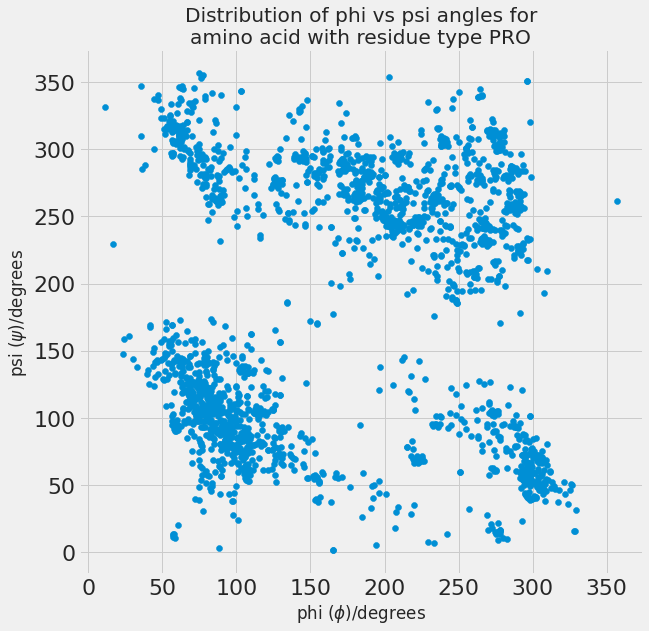

In [ ]:
# Scatter plot to see the distribution of the 
# samples of residue type PRO
plt.figure(figsize=(9, 9))
plt.title("Distribution of phi vs psi angles for\namino acid with residue type PRO")
plt.scatter(gly_residue["phi_shifted"], gly_residue["psi_shifted"])

plt.xlabel('phi ($\phi$)/degrees')
plt.ylabel('psi ($\psi$)/degrees')
plt.show()

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(gly_residue[["phi_shifted", "psi_shifted"]])

In [ ]:
#plot elbow to determine number of ks
kmeans_kwargs = {"n_init": 10, "max_iter": 300, "random_state": 42, "init":'k-means++'}

We used k-mean++ to select initial cluster centers for k-mean clustering in a smart way to speed up convergence

In [ ]:
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  sse.append(kmeans.inertia_)

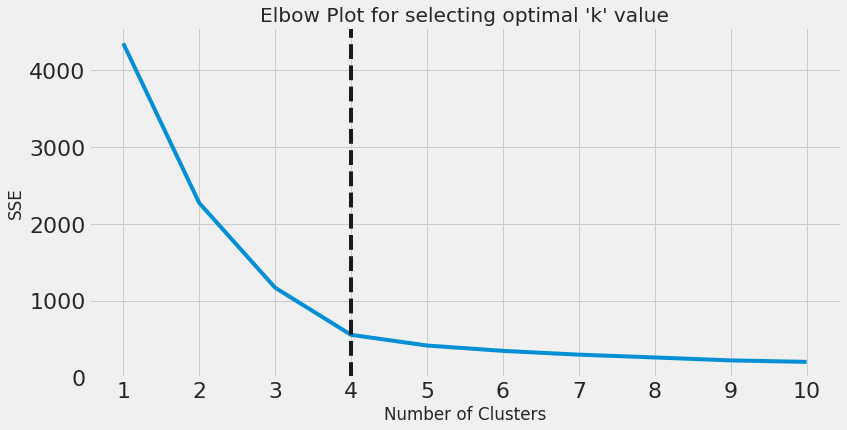

In [ ]:
plt.figure(figsize=(12, 6))
plt.style.use("fivethirtyeight")

plt.plot(range(1, 11), sse)

plt.xticks(range(1, 11))
plt.ylim(ymin=0)

plt.axvline(x = 4, color = 'k', linestyle='--')

plt.title("Elbow Plot for selecting optimal 'k' value")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")

plt.show()

From the elbow plot, we obtain the optimal k-value to be 4.








In [ ]:
gly_residue = gly_residue.sort_values(by = ["phi_shifted", "psi_shifted"])
gly_residue_2 = gly_residue[["phi_shifted", "psi_shifted"]]

In [ ]:
X = StandardScaler().fit_transform(gly_residue_2)

In [ ]:
# compute DBSCAN
db = DBSCAN(eps = 0.218, min_samples = 29).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_


# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 4
Estimated number of noise points: 146


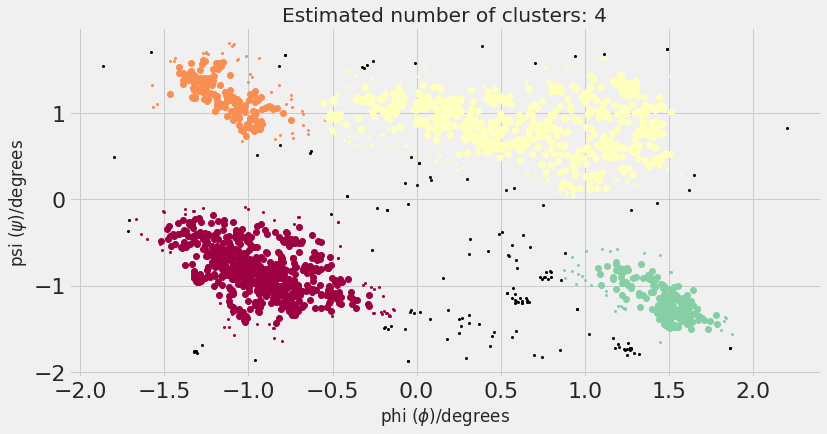

In [ ]:
# Plot result
plt.figure(figsize=(12, 6))
# Black removed from colors
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
        markeredgecolor=tuple(col), markersize=6)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor=tuple(col), markersize=2)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.xlabel('phi ($\phi$)/degrees')
plt.ylabel('psi ($\psi$)/degrees')
plt.show()

Similar to 4(a) in order to tune the parameters for DBSCAN, k-means elbow plot was used to have an idea how many clusters to expect along with some domain knowledge. Since the sample size is smaller, we also used smaller epsilon and min_samples values.

The distribution of GLY amino acids have similar distribution as the general clusters despite having the most outliers in the amino acid residues. It has four clusters rather than 3 clusters in the general clusters which could be to the amount of noise that it has. But to understand why this is the case,we may require some domain knowledge.